In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

In [294]:
#received help from Dr. Tyler Mitchell from the Astronomy department of HSU to understand what certain variables mean and to develop analyzation ideas for this project

#What I'm looking for: the correlations (if any) between false positives to orbital periods, transit epochs, impact parameters, and transit duration?

#data used from NASA EXOPLANET ARCHIVE

In [295]:
df = pd.read_csv('https://raw.githubusercontent.com/HSU-S21-CS232/final-kc2191/main/updatedastro2.csv', index_col=0)

df

koi_pdisposition  koi_score  koi_period  koi_period_err1  \
koi_disposition                                                            
CONFIRMED              CANDIDATE      1.000    9.488036     2.780000e-05   
CONFIRMED              CANDIDATE      0.969   54.418383     2.480000e-04   
CANDIDATE              CANDIDATE      0.000   19.899140     1.490000e-05   
FALSE POSITIVE    FALSE POSITIVE      0.000    1.736952     2.630000e-07   
CONFIRMED              CANDIDATE      1.000    2.525592     3.760000e-06   
...                          ...        ...         ...              ...   
FALSE POSITIVE    FALSE POSITIVE      0.000    0.527699     1.160000e-07   
CANDIDATE              CANDIDATE      0.497    1.739849     1.780000e-05   
FALSE POSITIVE    FALSE POSITIVE      0.021    0.681402     2.430000e-06   
CANDIDATE              CANDIDATE      0.092  333.486169     4.240000e-03   
FALSE POSITIVE    FALSE POSITIVE      0.000    4.856035     6.360000e-05   

                 koi_period_err2  koi_time0bk  koi_time0bk_err1  \
koi_disposition                                                   
CONFIRMED          -2.780000e-05   170.538750          0.002160   
CONFIRMED          -2.480000e-04   162.513840          0.003520   
CANDIDATE          -1.490000e-05   175.850252          0.000581   
FALSE POSITIVE     -2.630000e-07   170.307565          0.000115   
CONFIRMED          -3.760000e-06   171.595550          0.001130   
...                          ...          ...               ...   
FALSE POSITIVE     -1.160000e-07   131.705093          0.000170   
CANDIDATE          -1.780000e-05   133.001270          0.007690   
FALSE POSITIVE     -2.430000e-06   132.181750          0.002850   
CANDIDATE          -4.240000e-03   153.615010          0.005070   
FALSE POSITIVE     -6.360000e-05   135.993300          0.010800   

                 koi_time0bk_err2  koi_impact  koi_impact_err1  ...  \
koi_disposition                                                 ...   
CONFIRMED               -0.002160       0.146            0.318  ...   
CONFIRMED               -0.003520       0.586            0.059  ...   
CANDIDATE               -0.000581       0.969            5.126  ...   
FALSE POSITIVE          -0.000115       1.276            0.115  ...   
CONFIRMED               -0.001130       0.701            0.235  ...   
...                           ...         ...              ...  ...   
FALSE POSITIVE          -0.000170       1.252            0.051  ...   
CANDIDATE               -0.007690       0.043            0.423  ...   
FALSE POSITIVE          -0.002850       0.147            0.309  ...   
CANDIDATE               -0.005070       0.214            0.255  ...   
FALSE POSITIVE          -0.010800       0.134            0.323  ...   

                 koi_depth  koi_depth_err1  koi_depth_err2  koi_prad  \
koi_disposition                                                        
CONFIRMED            616.0            19.5           -19.5      2.26   
CONFIRMED            875.0            35.5           -35.5      2.83   
CANDIDATE          10800.0           171.0          -171.0     14.60   
FALSE POSITIVE      8080.0            12.8           -12.8     33.46   
CONFIRMED            603.0            16.9           -16.9      2.75   
...                    ...             ...             ...       ...   
FALSE POSITIVE      1580.0             4.6            -4.6     29.35   
CANDIDATE             48.5             5.4            -5.4      0.72   
FALSE POSITIVE       104.0            14.7           -14.7      1.07   
CANDIDATE            639.0            52.7           -52.7     19.30   
FALSE POSITIVE        76.7            10.8           -10.8      1.05   

                 koi_prad_err1  koi_prad_err2  koi_insol  koi_insol_err1  \
koi_disposition                                                            
CONFIRMED                 0.26          -0.15      93.59           29.45   
CONFIRMED                 0.32          -0.19       9.11          

In [296]:
df.info()

#didn't come out edited

<class 'pandas.core.frame.DataFrame'>
Index: 9564 entries, CONFIRMED to FALSE POSITIVE
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_pdisposition   9564 non-null   object 
 1   koi_score          8054 non-null   float64
 2   koi_period         9564 non-null   float64
 3   koi_period_err1    9110 non-null   float64
 4   koi_period_err2    9110 non-null   float64
 5   koi_time0bk        9564 non-null   float64
 6   koi_time0bk_err1   9110 non-null   float64
 7   koi_time0bk_err2   9110 non-null   float64
 8   koi_impact         9201 non-null   float64
 9   koi_impact_err1    9110 non-null   float64
 10  koi_impact_err2    9110 non-null   float64
 11  koi_duration       9564 non-null   float64
 12  koi_duration_err1  9110 non-null   float64
 13  koi_duration_err2  9110 non-null   float64
 14  koi_depth          9201 non-null   float64
 15  koi_depth_err1     9110 non-null   float64
 16  koi_depth_e

In [297]:
df2 = pd.read_csv('https://raw.githubusercontent.com/HSU-S21-CS232/final-kc2191/main/updatedastro3.csv', index_col=0)

df2

koi_pdisposition  koi_score  koi_period  koi_time0bk  \
koi_disposition                                                        
CONFIRMED              CANDIDATE      1.000    9.488036   170.538750   
CONFIRMED              CANDIDATE      0.969   54.418383   162.513840   
CANDIDATE              CANDIDATE      0.000   19.899140   175.850252   
FALSE POSITIVE    FALSE POSITIVE      0.000    1.736952   170.307565   
CONFIRMED              CANDIDATE      1.000    2.525592   171.595550   
...                          ...        ...         ...          ...   
FALSE POSITIVE    FALSE POSITIVE      0.000    0.527699   131.705093   
CANDIDATE              CANDIDATE      0.497    1.739849   133.001270   
FALSE POSITIVE    FALSE POSITIVE      0.021    0.681402   132.181750   
CANDIDATE              CANDIDATE      0.092  333.486169   153.615010   
FALSE POSITIVE    FALSE POSITIVE      0.000    4.856035   135.993300   

                 koi_impact  koi_duration  koi_depth  koi_prad  koi_insol  \
koi_disposition                                                             
CONFIRMED             0.146       2.95750      616.0      2.26      93.59   
CONFIRMED             0.586       4.50700      875.0      2.83       9.11   
CANDIDATE             0.969       1.78220    10800.0     14.60      39.30   
FALSE POSITIVE        1.276       2.40641     8080.0     33.46     891.96   
CONFIRMED             0.701       1.65450      603.0      2.75     926.16   
...                     ...           ...        ...       ...        ...   
FALSE POSITIVE        1.252       3.22210     1580.0     29.35    4500.53   
CANDIDATE             0.043       3.11400       48.5      0.72    1585.81   
FALSE POSITIVE        0.147       0.86500      104.0      1.07    5713.41   
CANDIDATE             0.214       3.19900      639.0     19.30      22.68   
FALSE POSITIVE        0.134       3.07800       76.7      1.05     607.42   

                 koi_model_snr  
koi_disposition                 
CONFIRMED                 35.8  
CONFIRMED                 25.8  
CANDIDATE                 76.3  
FALSE POSITIVE           505.6  
CONFIRMED                 40.9  
...                        ...  
FALSE POSITIVE           453.3  
CANDIDATE                 10.6  
FALSE POSITIVE            12.3  
CANDIDATE                 14.0  
FALSE POSITIVE             8.2  

[9564 rows x 10 columns]

In [298]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9564 entries, CONFIRMED to FALSE POSITIVE
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_pdisposition  9564 non-null   object 
 1   koi_score         8054 non-null   float64
 2   koi_period        9564 non-null   float64
 3   koi_time0bk       9564 non-null   float64
 4   koi_impact        9201 non-null   float64
 5   koi_duration      9564 non-null   float64
 6   koi_depth         9201 non-null   float64
 7   koi_prad          9201 non-null   float64
 8   koi_insol         9243 non-null   float64
 9   koi_model_snr     9201 non-null   float64
dtypes: float64(9), object(1)
memory usage: 821.9+ KB


In [299]:
df2.head()

#data looks solid in the beginning part of the file

koi_pdisposition  koi_score  koi_period  koi_time0bk  \
koi_disposition                                                        
CONFIRMED              CANDIDATE      1.000    9.488036   170.538750   
CONFIRMED              CANDIDATE      0.969   54.418383   162.513840   
CANDIDATE              CANDIDATE      0.000   19.899140   175.850252   
FALSE POSITIVE    FALSE POSITIVE      0.000    1.736952   170.307565   
CONFIRMED              CANDIDATE      1.000    2.525592   171.595550   

                 koi_impact  koi_duration  koi_depth  koi_prad  koi_insol  \
koi_disposition                                                             
CONFIRMED             0.146       2.95750      616.0      2.26      93.59   
CONFIRMED             0.586       4.50700      875.0      2.83       9.11   
CANDIDATE             0.969       1.78220    10800.0     14.60      39.30   
FALSE POSITIVE        1.276       2.40641     8080.0     33.46     891.96   
CONFIRMED             0.701       1.65450      603.0      2.75     926.16   

                 koi_model_snr  
koi_disposition                 
CONFIRMED                 35.8  
CONFIRMED                 25.8  
CANDIDATE                 76.3  
FALSE POSITIVE           505.6  
CONFIRMED                 40.9

In [300]:
df2.tail()

#data looks solid in the last part too
#this lets me know that the csv file was imported successfully and everything is printing out successfully

koi_pdisposition  koi_score  koi_period  koi_time0bk  \
koi_disposition                                                        
FALSE POSITIVE    FALSE POSITIVE      0.000    0.527699   131.705093   
CANDIDATE              CANDIDATE      0.497    1.739849   133.001270   
FALSE POSITIVE    FALSE POSITIVE      0.021    0.681402   132.181750   
CANDIDATE              CANDIDATE      0.092  333.486169   153.615010   
FALSE POSITIVE    FALSE POSITIVE      0.000    4.856035   135.993300   

                 koi_impact  koi_duration  koi_depth  koi_prad  koi_insol  \
koi_disposition                                                             
FALSE POSITIVE        1.252        3.2221     1580.0     29.35    4500.53   
CANDIDATE             0.043        3.1140       48.5      0.72    1585.81   
FALSE POSITIVE        0.147        0.8650      104.0      1.07    5713.41   
CANDIDATE             0.214        3.1990      639.0     19.30      22.68   
FALSE POSITIVE        0.134        3.0780       76.7      1.05     607.42   

                 koi_model_snr  
koi_disposition                 
FALSE POSITIVE           453.3  
CANDIDATE                 10.6  
FALSE POSITIVE            12.3  
CANDIDATE                 14.0  
FALSE POSITIVE             8.2

In [301]:
df2.shape

#From the data produced on the NASA website, I know there is't going to be duplicates, but I'll just double check

(9564, 10)

In [302]:
df2.drop_duplicates()

df2.shape

#no duplicates confirmed

(9564, 10)

In [303]:
df2.columns

Index(['koi_pdisposition', 'koi_score', 'koi_period', 'koi_time0bk',
       'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_insol',
       'koi_model_snr'],
      dtype='object')

In [304]:
df2.rename(columns={
    'koi_pdisposition': 'Exoplanet_Status',
    'koi_score': 'Confidence_Score',
    'koi_period': 'Orbital_Period(days)',
    'koi_time0bk': 'Transit_Epoch',
    'koi_impact': 'Impact_Parameter',
    'koi_duration': 'Transit_Duration(Hours)',
    'koi_depth': 'Transit_Depth(ppm)',
    'koi_prad': 'Planetary_Radius',
    'koi_insol': 'Isolation_Flux(Earth_Flux)',
    'koi_model_snr': 'Transit_Signal_to_Noise'
}, inplace=True)

In [305]:
df2.columns

'''Exoplanet_Status: Whether the exoplanet was confirmed to be an actual exoplanet or not
Confidence_Score: From 0 to 1, the confidence of the answer inputted for exoplanet_status
Orbital_Period: the amount of time in days that it takes for a planet to orbit fully once
Transit_Epoch: date of when the transit occured (BCJD--julian date)
Impact_Paramater: the distance from a planet and its respective star
Transit_Duration: the length of the initial transmission
'''

#I believe these will be the only columns I'll need

'Exoplanet_Status: Whether the exoplanet was confirmed to be an actual exoplanet or not\nConfidence_Score: From 0 to 1, the confidence of the answer inputted for exoplanet_status\nOrbital_Period: the amount of time in days that it takes for a planet to orbit fully once\nTransit_Epoch: date of when the transit occured (BCJD--julian date)\nImpact_Paramater: the distance from a planet and its respective star\nTransit_Duration: the length of the initial transmission\n'

In [306]:
df2.isnull().sum()

Exoplanet_Status                 0
Confidence_Score              1510
Orbital_Period(days)             0
Transit_Epoch                    0
Impact_Parameter               363
Transit_Duration(Hours)          0
Transit_Depth(ppm)             363
Planetary_Radius               363
Isolation_Flux(Earth_Flux)     321
Transit_Signal_to_Noise        363
dtype: int64

In [307]:
df2.dropna()

Exoplanet_Status  Confidence_Score  Orbital_Period(days)  \
koi_disposition                                                            
CONFIRMED              CANDIDATE             1.000              9.488036   
CONFIRMED              CANDIDATE             0.969             54.418383   
CANDIDATE              CANDIDATE             0.000             19.899140   
FALSE POSITIVE    FALSE POSITIVE             0.000              1.736952   
CONFIRMED              CANDIDATE             1.000              2.525592   
...                          ...               ...                   ...   
FALSE POSITIVE    FALSE POSITIVE             0.000              0.527699   
CANDIDATE              CANDIDATE             0.497              1.739849   
FALSE POSITIVE    FALSE POSITIVE             0.021              0.681402   
CANDIDATE              CANDIDATE             0.092            333.486169   
FALSE POSITIVE    FALSE POSITIVE             0.000              4.856035   

                 Transit_Epoch  Impact_Parameter  Transit_Duration(Hours)  \
koi_disposition                                                             
CONFIRMED           170.538750             0.146                  2.95750   
CONFIRMED           162.513840             0.586                  4.50700   
CANDIDATE           175.850252             0.969                  1.78220   
FALSE POSITIVE      170.307565             1.276                  2.40641   
CONFIRMED           171.595550             0.701                  1.65450   
...                        ...               ...                      ...   
FALSE POSITIVE      131.705093             1.252                  3.22210   
CANDIDATE           133.001270             0.043                  3.11400   
FALSE POSITIVE      132.181750             0.147                  0.86500   
CANDIDATE           153.615010             0.214                  3.19900   
FALSE POSITIVE      135.993300             0.134                  3.07800   

                 Transit_Depth(ppm)  Planetary_Radius  \
koi_disposition                                         
CONFIRMED                     616.0              2.26   
CONFIRMED                     875.0              2.83   
CANDIDATE                   10800.0             14.60   
FALSE POSITIVE               8080.0             33.46   
CONFIRMED                     603.0              2.75   
...                             ...               ...   
FALSE POSITIVE               1580.0             29.35   
CANDIDATE                      48.5              0.72   
FALSE POSITIVE                104.0              1.07   
CANDIDATE                     639.0             19.30   
FALSE POSITIVE                 76.7              1.05   

                 Isolation_Flux(Earth_Flux)  Transit_Signal_to_Noise  
koi_disposition                                                       
CONFIRMED                             93.59                     35.8  
CONFIRMED                              9.11                     25.8  
CANDIDATE                             39.30                     76.3  
FALSE POSITIVE                       891.96                    505.6  
CONFIRMED                            926.16                     40.9  
...                                     ...                      ...  
FALSE POSITIVE                      4500.53                    453.3  
CANDIDATE                           1585.81                     10.6  
FALSE POSITIVE                      5713.41                     12.3  
CANDIDATE                             22.68                     14.0  
FALSE POSITIVE                       607.42                      8.2  

[7995 rows x 10 columns]

In [308]:
df2.corr()

Confidence_Score  Orbital_Period(days)  \
Confidence_Score                    1.000000             -0.070669   
Orbital_Period(days)               -0.070669              1.000000   
Transit_Epoch                      -0.008329              0.095580   
Impact_Parameter                   -0.214340              0.004928   
Transit_Duration(Hours)            -0.173200              0.037302   
Transit_Depth(ppm)                 -0.301013             -0.009182   
Planetary_Radius                   -0.076870              0.005135   
Isolation_Flux(Earth_Flux)         -0.030995             -0.002603   
Transit_Signal_to_Noise            -0.269034             -0.009614   

                            Transit_Epoch  Impact_Parameter  \
Confidence_Score                -0.008329         -0.214340   
Orbital_Period(days)             0.095580          0.004928   
Transit_Epoch                    1.000000          0.049241   
Impact_Parameter                 0.049241          1.000000   
Transit_Duration(Hours)          0.216271          0.036955   
Transit_Depth(ppm)              -0.051029          0.005605   
Planetary_Radius                 0.034992          0.677380   
Isolation_Flux(Earth_Flux)      -0.022279         -0.003659   
Transit_Signal_to_Noise         -0.058781         -0.000476   

                            Transit_Duration(Hours)  Transit_Depth(ppm)  \
Confidence_Score                          -0.173200           -0.301013   
Orbital_Period(days)                       0.037302           -0.009182   
Transit_Epoch                              0.216271           -0.051029   
Impact_Parameter                           0.036955            0.005605   
Transit_Duration(Hours)                    1.000000            0.067271   
Transit_Depth(ppm)                         0.067271            1.000000   
Planetary_Radius                           0.036573            0.002561   
Isolation_Flux(Earth_Flux)                -0.018973           -0.006310   
Transit_Signal_to_Noise                    0.083584            0.579732   

                            Planetary_Radius  Isolation_Flux(Earth_Flux)  \
Confidence_Score                   -0.076870                   -0.030995   
Orbital_Period(days)                0.005135                   -0.002603   
Transit_Epoch                       0.034992                   -0.022279   
Impact_Parameter                    0.677380                   -0.003659   
Transit_Duration(Hours)             0.036573                   -0.018973   
Transit_Depth(ppm)                  0.002561                   -0.006310   
Planetary_Radius                    1.000000                    0.002989   
Isolation_Flux(Earth_Flux)          0.002989                    1.000000   
Transit_Signal_to_Noise            -0.001746                   -0.008197   

                            Transit_Signal_to_Noise  
Confidence_Score                          -0.269034  
Orbital_Period(days)                      -0.009614  
Transit_Epoch                             -0.058781  
Impact_Parameter                          -0.000476  
Transit_Duration(Hours)                    0.083584  
Transit_Depth(ppm)                         0.579732  
Planetary_Radius                          -0.001746  
Isolation_Flux(Earth_Flux)                -0.008197  
Transit_Signal_to_Noise                    1.000000

In [309]:
df2.iloc[1]

Exoplanet_Status              CANDIDATE
Confidence_Score                  0.969
Orbital_Period(days)          54.418383
Transit_Epoch                 162.51384
Impact_Parameter                  0.586
Transit_Duration(Hours)           4.507
Transit_Depth(ppm)                875.0
Planetary_Radius                   2.83
Isolation_Flux(Earth_Flux)         9.11
Transit_Signal_to_Noise            25.8
Name: CONFIRMED, dtype: object

In [310]:
condition = (df2['Exoplanet_Status'] == 'CANDIDATE')

condition.head()

koi_disposition
CONFIRMED          True
CONFIRMED          True
CANDIDATE          True
FALSE POSITIVE    False
CONFIRMED          True
Name: Exoplanet_Status, dtype: bool

In [311]:
df2[df2['Exoplanet_Status'] == "CANDIDATE"]


Exoplanet_Status  Confidence_Score  Orbital_Period(days)  \
koi_disposition                                                            
CONFIRMED              CANDIDATE             1.000              9.488036   
CONFIRMED              CANDIDATE             0.969             54.418383   
CANDIDATE              CANDIDATE             0.000             19.899140   
CONFIRMED              CANDIDATE             1.000              2.525592   
CONFIRMED              CANDIDATE             1.000             11.094321   
...                          ...               ...                   ...   
CANDIDATE              CANDIDATE             0.843              7.268182   
CANDIDATE              CANDIDATE             0.189            376.379890   
CANDIDATE              CANDIDATE             0.519            367.947848   
CANDIDATE              CANDIDATE             0.497              1.739849   
CANDIDATE              CANDIDATE             0.092            333.486169   

                 Transit_Epoch  Impact_Parameter  Transit_Duration(Hours)  \
koi_disposition                                                             
CONFIRMED           170.538750             0.146                   2.9575   
CONFIRMED           162.513840             0.586                   4.5070   
CANDIDATE           175.850252             0.969                   1.7822   
CONFIRMED           171.595550             0.701                   1.6545   
CONFIRMED           171.201160             0.538                   4.5945   
...                        ...               ...                      ...   
CANDIDATE           135.934800             0.780                   4.9850   
CANDIDATE           486.602200             0.305                  13.9900   
CANDIDATE           416.209980             0.902                   4.2490   
CANDIDATE           133.001270             0.043                   3.1140   
CANDIDATE           153.615010             0.214                   3.1990   

                 Transit_Depth(ppm)  Planetary_Radius  \
koi_disposition                                         
CONFIRMED                     616.0              2.26   
CONFIRMED                     875.0              2.83   
CANDIDATE                   10800.0             14.60   
CONFIRMED                     603.0              2.75   
CONFIRMED                    1520.0              3.90   
...                             ...               ...   
CANDIDATE                      46.7              1.66   
CANDIDATE                    1140.0              3.26   
CANDIDATE                    1300.0              3.72   
CANDIDATE                      48.5              0.72   
CANDIDATE                     639.0             19.30   

                 Isolation_Flux(Earth_Flux)  Transit_Signal_to_Noise  
koi_disposition                                                       
CONFIRMED                             93.59                     35.8  
CONFIRMED                              9.11                     25.8  
CANDIDATE                             39.30                     76.3  
CONFIRMED                            926.16                     40.9  
CONFIRMED                            114.81                     66.5  
...                                     ...                      ...  
CANDIDATE                           1027.95                      9.7  
CANDIDATE                              1.16                     13.3  
CANDIDATE                              0.64                     10.7  
CANDIDATE                           1585.81                     10.6  
CANDIDATE                             22.68                     14.0  

[4717 rows x 10 columns]

In [312]:
plt.rcParams.update({'font.size': 20, 'figure.figsize': (6, 4)})

<AxesSubplot:title={'center':'Candidates vs. Transit_Epoch'}, xlabel='Exoplanet_Status', ylabel='Transit_Epoch'>

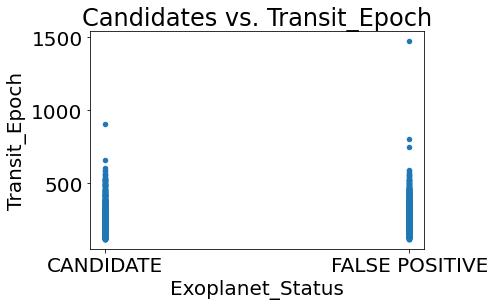

In [313]:
df2.plot(kind='scatter', x='Exoplanet_Status', y='Transit_Epoch', title='Candidates vs. Transit_Epoch')

#results does not show too much correlation between candidates and transit epoch

<AxesSubplot:title={'center':'Candidates vs. Orbital Period'}, xlabel='Exoplanet_Status', ylabel='Orbital_Period(days)'>

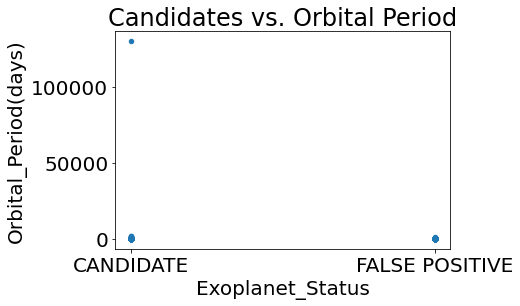

In [314]:
df2.plot(kind='scatter', x='Exoplanet_Status', y='Orbital_Period(days)', title='Candidates vs. Orbital Period')

#results show that there is a possible correlation between candidates and orbital periods
#it appears that all false positives have had very low orbital periods, whereas the candidates vary

"exoplanets' impact parameter are more patternized, compared to the false positives which are all over the place"

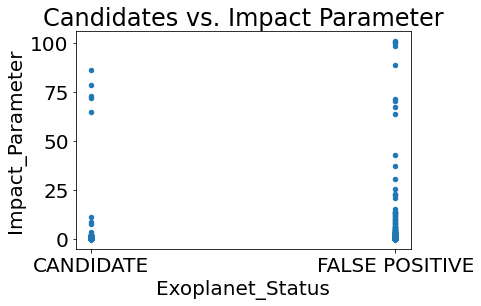

In [315]:
df2.plot(kind='scatter', x='Exoplanet_Status', y='Impact_Parameter', title='Candidates vs. Impact Parameter')

#there appears to be more of a pattern in this one
'''exoplanets' impact parameter are more patternized, compared to the false positives which are all over the place'''

'exoplanets that are confirmed to be exoplanets had a shorter transit duration, compared to false positives'

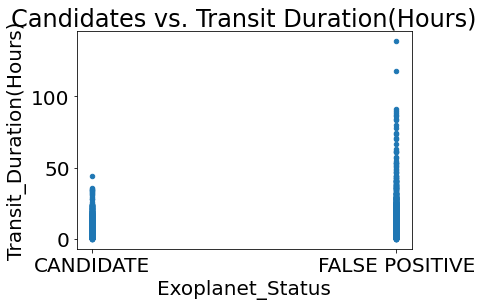

In [316]:
df2.plot(kind='scatter', x='Exoplanet_Status', y='Transit_Duration(Hours)', title='Candidates vs. Transit Duration(Hours)')

#another correlation potentially present
'''exoplanets that are confirmed to be exoplanets had a shorter transit duration, compared to false positives'''

'false positives have way more transit depths compared to confirmed exoplanets'

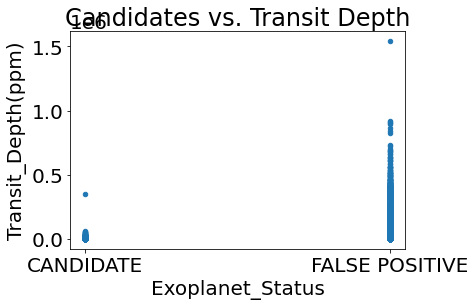

In [320]:
df2.plot(kind='scatter', x='Exoplanet_Status', y='Transit_Depth(ppm)', title='Candidates vs. Transit Depth')

#another interesting pattern recognized

'''false positives have way more transit depths compared to confirmed exoplanets'''

<AxesSubplot:title={'center':'Candidates vs. Isolation_Flux'}, xlabel='Exoplanet_Status', ylabel='Isolation_Flux(Earth_Flux)'>

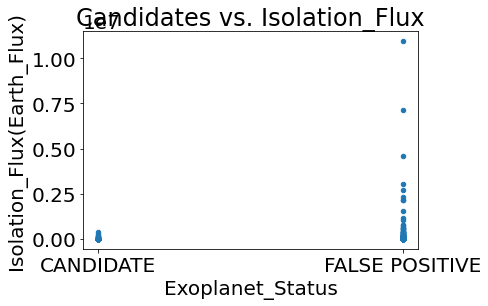

In [318]:
df2.plot(kind='scatter', x='Exoplanet_Status', y='Isolation_Flux(Earth_Flux)', title='Candidates vs. Isolation_Flux')


<AxesSubplot:title={'center':'Candidates vs. Transit_Signal_to_Noise'}, xlabel='Exoplanet_Status', ylabel='Transit_Signal_to_Noise'>

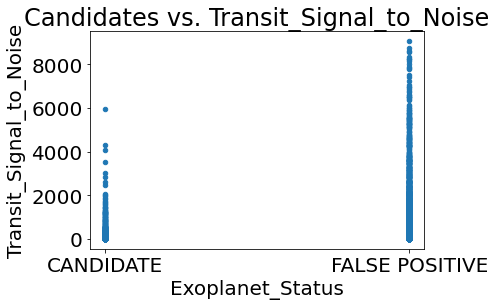

In [292]:
df2.plot(kind='scatter', x='Exoplanet_Status', y='Transit_Signal_to_Noise', title='Candidates vs. Transit_Signal_to_Noise')

#not surprisingly, false positives have an erratic unpredicitable transit-signal-to-noise

In [ ]:
'''
Ultimately, exoplanets have a pattern of having similar transit durations, transit depths, isolation flux, and transit-signal-to-noise. The big take away from this analysis is that there is a limit on the distance between an exoplanet and their respective star that they're orbiting due to the gravitational effects that stars have on exoplanets. If that distance is too far, then at that point, another star would most likely begin to have gravitational influences on that planet, causing the planet to begin rotating around it. This is revealed when we looked at tbe usual distance between an exoplanet and a star (impact parameter) and the temperature of the exoplanet (isolation flux). When looking at the graph where the impact parameter is the output, we could see that there are two bounds that exoplanets usually lie on: either they're close to their respective star or far away. That might have to do with gravitational pull, as the planets that are close to their star are gravitationally dominating its orbit, whereas the ones that are father away are being pulled by their respective star and another force; or it could simply be the restraints on astronomers' observational abilities. Nevertheless, it data shows that a pattern definitely exists. 

With the isolation flux (the temperature of the exoplanets), it might appear like a fluke at initial glance that the temperatures are bounded in such small domains. However, one must remember that, that data is scaled, and so within those small regions, the temperature could be between from really cold to really hot. Anything outside of those regions are most likely extreme temperatures that are never present within exoplanets. By looking at the false positives, we see that the isolation flux data is all over the place, which makes sense because the false positives are just other space objects,and thus it makes sense that those temperatures vary. 

I also want to note that although there might be a notion that planets could vary wildly in size because we peronsally know of planets that are small like  Earth and ones that are big like Jupiter, there actually might be a constraint to how big planets get and how small they get, by looking at the transit depth data. It appears that the exoplanets discovered are normally within a domain. That might have to do with how planets were formed via the big bang, and what would occur to an object that gets too big and also too small Overall, the next step that I'm most likely going to take is contact Dr. Tyler Mitchell next semester and present this analyzization to him. He gave me a bunch of fits files that you could see in my repository, and I'll most likely start analyzing them to reproduce similar datas to see if my analyziation still holds up.
'''